In [111]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
df = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [114]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [115]:
df.replace(['Yes','No'], [1,0], inplace=True)
df.replace(['Female','Male'],[1,0], inplace=True)

In [116]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['VisitFrequency']=le.fit_transform(df['VisitFrequency'])
df['Like']=le.fit_transform(df['Like'])

In [117]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,4.636614,44.604955,2.637990,0.542326
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.446175,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,3.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,71.000000,5.000000,1.000000


In [118]:
df.groupby('VisitFrequency').agg('mean')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
VisitFrequency,,,,,,,,,,,,,,
0,0.505848,0.950292,0.099415,0.874269,0.532164,0.888889,0.567251,0.616959,0.362573,0.184211,0.236842,3.979532,46.666667,0.555556
1,0.944444,0.981481,0.129630,0.777778,0.407407,0.944444,0.648148,0.944444,0.370370,0.407407,0.055556,6.111111,37.944444,0.481481
2,0.045802,0.580153,0.106870,0.946565,0.770992,0.847328,0.526718,0.160305,0.419847,0.053435,0.740458,8.106870,51.167939,0.496183
3,0.742597,0.965831,0.082005,0.842825,0.437358,0.922551,0.610478,0.820046,0.337130,0.230068,0.102506,3.391800,42.305239,0.539863
4,0.800000,0.974468,0.093617,0.834043,0.476596,0.910638,0.685106,0.842553,0.336170,0.276596,0.089362,4.485106,38.753191,0.502128
5,0.234127,0.841270,0.091270,0.908730,0.619048,0.884921,0.567460,0.376984,0.373016,0.123016,0.420635,5.718254,49.285714,0.603175


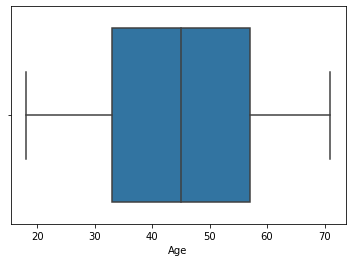

In [119]:
sns.boxplot(x='Age',data=df)
plt.show()

In [120]:
from sklearn.decomposition import PCA
pca = PCA()
t_df = pca.fit_transform(df.iloc[:,:-4])

In [121]:
pca.explained_variance_ratio_.cumsum()

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [122]:
cols = ['PC'+str(i) for i in range(1,12)]
c_df = pd.DataFrame(pca.components_.T,columns = cols,index=df.columns[:-4])
c_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


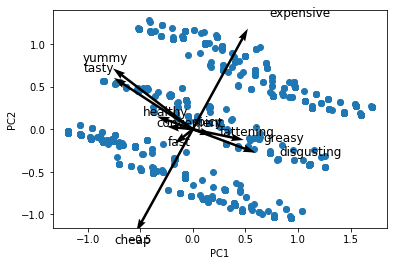

In [123]:
plt.scatter(t_df[:,0],t_df[:,1])
for i in range(len(c_df)):
    b = (c_df.iloc[i,0],c_df.iloc[i,1])
    t_loc = (c_df.iloc[i,0]*2.2,c_df.iloc[i,1]*2.2)
    plt.quiver(0,0,*b,scale=2)
    plt.text(*t_loc, c_df.index[i], fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [124]:
X=df.values

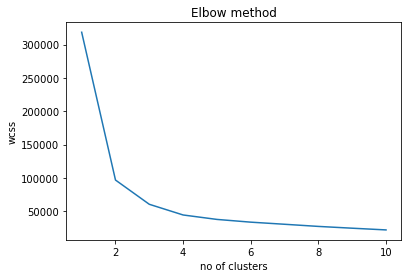

In [125]:

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [126]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[0 3 0 ... 3 2 1]


In [127]:
clusters=kmeans.cluster_centers_
print(clusters)

[[62.35309973  4.91644205]
 [25.13109756  7.14329268]
 [37.67473118  6.07795699]
 [50.83769634  5.14659686]]
